In [6]:
from bk_codes import *

from matplotlib import pyplot as plt
from matplotlib import container

from archiver4qiskit import get_archive

from qiskit.visualization.timeline import draw

To define experiments, we need to set the number of rounds, whether to use dynamical decoupling, and the order in which the three colours of link operators are measured.

Note that the minimum number of rounds required to see a syndrome change for all plaquette types is 10.

In [23]:
rounds = 10
dd = True
processor = 'Falcon'

In [24]:
archive_id = run_experiment('aer_simulator',rounds,processor=processor,prob=0.0)
w_av_z, w_av_x = get_results(archive_id)

w_av_z, w_av_x

([[0.0], [0.0]], [[0.0], [0.0]])

To get the circuit that will be run for a specific backend, put the backend name below. For a simulated circuit (which won't include scheduling or dynamical decoupling) the processor type can be specified (e.g. `processor='Hummingbird'`).

In [12]:
backend_name = 'ibm_cairo'
processor = None

if backend_name:
    N, plaquettes, colors, links, processor = get_params(backend_name, processor=processor)
    qc , output = get_circuit(rounds, backend_name, N, plaquettes, colors, links, dd)
    
if 'simulator' in backend_name:
    fig = qc.draw(output='mpl')
else:
    fig = draw(qc)
fig

TypeError: get_params() got an unexpected keyword argument 'processor'

To run some experiments, supply a list of names for Falcon, Hummingbird and Eagle devices. The job objects will be archived locally by [archiver4qiskit](https://github.com/NCCR-SPIN/archiver4qiskit?organization=NCCR-SPIN&organization=NCCR-SPIN), with a corresponding archive id.

In [9]:
backend_names = [
    'ibmq_montreal'
]

archive_ids = []
for backend_name in backend_names:
    archive_ids.append(run_experiment(backend_name,rounds))
print(archive_ids)


KeyboardInterrupt: 

Here are some archive ids we made earler.

In [10]:
archive_ids = [
    '62345c81a2f72dbef1da9b94@ibm_hanoi',
    '623267afd2b0cb111d5f3b34@ibmq_kolkata',
    '623267d2d2b0cb8e375f3b35@ibm_auckland',
    '623268c11c417563ad530f1f@ibm_peekskill',
    '62345c11538eba729760f9b1@ibmq_mumbai',
    '6234eb2c538ebac43760fbb9@ibm_washington',
    '6234ed3f09995c5433490f2e@ibmq_montreal'
    
]
archive_ids = ['6234eb2c538ebac43760fbb9@ibm_washington', '6234ed3f09995c5433490f2e@ibmq_montreal']
#archive_ids = []

Now we can process and obtain the results. Uncomment the last line to just use the processed results that were made earlier.

In [32]:
q_results = []
if archive_ids:
    q_results = []
    for archive_id in archive_ids:
        w_av = get_results(archive_id)
        probs_meas, probs_prep, probs_cx, probs_idle, p_0, p_0_std = noise_details(archive_id)
        q_results.append([archive_id,
                          p_0,
                          np.min(w_av),
                          np.mean(w_av),
                          np.max(w_av)])
else:
    q_results = [['623267afd2b0cb111d5f3b34@ibmq_kolkata', 0.014733665698841237, 0.3146630859375, 0.3688604736328125, 0.40492431640625], ['623267d2d2b0cb8e375f3b35@ibm_auckland', 0.018246353080956606, 0.35726318359375, 0.420758056640625, 0.4860009765625], ['623268c11c417563ad530f1f@ibm_peekskill', 0.02158705539743783, 0.351126708984375, 0.43315338134765624, 0.503963623046875], ['62345c11538eba729760f9b1@ibmq_mumbai', 0.023846321339006552, 0.42385498046875, 0.44714202880859377, 0.485615234375], ['62345c81a2f72dbef1da9b94@ibm_hanoi', 0.013997134586234361, 0.315760498046875, 0.3497122192382812, 0.390245361328125], ['62345cd409995c3e58490d2c@ibmq_brooklyn', 0.027806546647267286, 0.43721435546875, 0.4844329833984375, 0.50123046875], ['6234ed3f09995c5433490f2e@ibmq_montreal', 0.04360945770430646, 0.4704638671875, 0.4812063598632812, 0.489691162109375], ['6234eb2c538ebac43760fbb9@ibm_washington', 0.030997275988027092, 0.3896484375, 0.4712257385253906, 0.506591796875]]
    #[['623267afd2b0cb111d5f3b34@ibmq_kolkata', 0.014733665698841237, 0.3146630859375, 0.3688604736328125, 0.40492431640625], ['623267d2d2b0cb8e375f3b35@ibm_auckland', 0.018246353080956606, 0.35726318359375, 0.420758056640625, 0.4860009765625], ['623268c11c417563ad530f1f@ibm_peekskill', 0.02158705539743783, 0.351126708984375, 0.43315338134765624, 0.503963623046875], ['62345c11538eba729760f9b1@ibmq_mumbai', 0.023846321339006552, 0.42385498046875, 0.44714202880859377, 0.485615234375], ['62345c81a2f72dbef1da9b94@ibm_hanoi', 0.013997134586234361, 0.315760498046875, 0.3497122192382812, 0.390245361328125]]
    
    

In [30]:
print(q_results)

[['623267afd2b0cb111d5f3b34@ibmq_kolkata', 0.014733665698841237, 0.3146630859375, 0.3688604736328125, 0.40492431640625], ['623267d2d2b0cb8e375f3b35@ibm_auckland', 0.018246353080956606, 0.35726318359375, 0.420758056640625, 0.4860009765625], ['623268c11c417563ad530f1f@ibm_peekskill', 0.02158705539743783, 0.351126708984375, 0.43315338134765624, 0.503963623046875], ['62345c11538eba729760f9b1@ibmq_mumbai', 0.023846321339006552, 0.42385498046875, 0.44714202880859377, 0.485615234375], ['62345c81a2f72dbef1da9b94@ibm_hanoi', 0.013997134586234361, 0.315760498046875, 0.3497122192382812, 0.390245361328125], ['62345cd409995c3e58490d2c@ibmq_brooklyn', 0.027806546647267286, 0.43721435546875, 0.4844329833984375, 0.50123046875], ['6234ed3f09995c5433490f2e@ibmq_montreal', 0.04360945770430646, 0.4704638671875, 0.4812063598632812, 0.489691162109375], ['6234eb2c538ebac43760fbb9@ibm_washington', 0.030997275988027092, 0.3896484375, 0.4712257385253906, 0.506591796875]]


To compare these with something, we do simulations with a simple error model parameterized by a single probability. Supply a list of probabilities to generate some results, or supply an empty list to use the results that were made earlier.

In [21]:
probs = []
#probs = [0.01, 0.019, 0.024, 0.07, 0.017, 0.011, 0.06, 0.023, 0.016, 0.02, 0.013, 0.04, 0.05, 0.009, 0.022, 0.018, 0.005, 0.021, 0.006, 0.025, 0.035, 0.007, 0.055, 0.014, 0.012, 0.045, 0.015, 0.065, 0.0175, 0.008, 0.03]

if probs:
    sim_results = {}
    for prob in probs:
        archive_id = run_experiment('aer_simulator',rounds,prob=prob)
        w_av = get_results(archive_id)
        sim_results[prob] = np.mean(w_av)
else:
    sim_results = {0.01: 0.186370849609375, 0.019: 0.298248291015625, 0.024: 0.34228515625, 0.07: 0.485504150390625, 0.017: 0.276031494140625, 0.011: 0.206878662109375, 0.06: 0.468292236328125, 0.023: 0.33331298828125, 0.016: 0.2633056640625, 0.02: 0.305389404296875, 0.013: 0.231689453125, 0.04: 0.427398681640625, 0.05: 0.45623779296875, 0.009: 0.1710205078125, 0.022: 0.32489013671875, 0.018: 0.2906494140625, 0.005: 0.106048583984375, 0.021: 0.314239501953125, 0.006: 0.12518310546875, 0.025: 0.346954345703125, 0.035: 0.407379150390625, 0.007: 0.141754150390625, 0.055: 0.466156005859375, 0.014: 0.24151611328125, 0.012: 0.21923828125, 0.045: 0.43878173828125, 0.015: 0.255279541015625, 0.065: 0.4722900390625, 0.0175: 0.283203125, 0.008: 0.156036376953125, 0.03: 0.38037109375}


In [22]:
print(sim_results)

{0.01: 0.186370849609375, 0.019: 0.298248291015625, 0.024: 0.34228515625, 0.07: 0.485504150390625, 0.017: 0.276031494140625, 0.011: 0.206878662109375, 0.06: 0.468292236328125, 0.023: 0.33331298828125, 0.016: 0.2633056640625, 0.02: 0.305389404296875, 0.013: 0.231689453125, 0.04: 0.427398681640625, 0.05: 0.45623779296875, 0.009: 0.1710205078125, 0.022: 0.32489013671875, 0.018: 0.2906494140625, 0.005: 0.106048583984375, 0.021: 0.314239501953125, 0.006: 0.12518310546875, 0.025: 0.346954345703125, 0.035: 0.407379150390625, 0.007: 0.141754150390625, 0.055: 0.466156005859375, 0.014: 0.24151611328125, 0.012: 0.21923828125, 0.045: 0.43878173828125, 0.015: 0.255279541015625, 0.065: 0.4722900390625, 0.0175: 0.283203125, 0.008: 0.156036376953125, 0.03: 0.38037109375}


Now we plot everything.

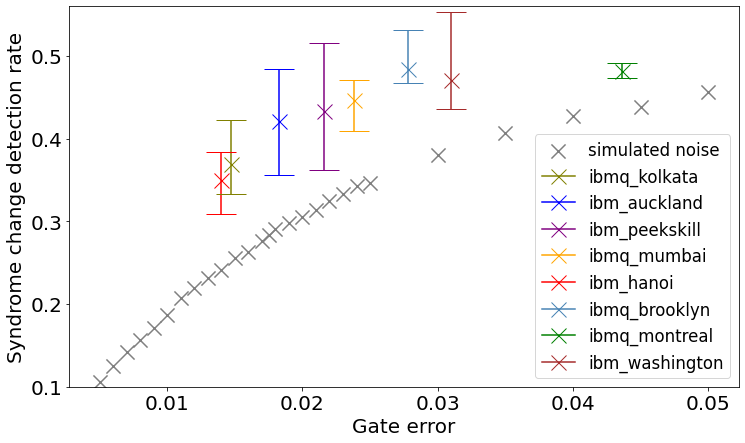

In [43]:
plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size': 20})

plt.xlabel('Gate error')
plt.ylabel('Syndrome change detection rate')

color = {'ibm_hanoi':'red', 'ibm_auckland':'blue', 'ibmq_kolkata':'olive','ibm_peekskill':'purple', 'ibmq_mumbai':'orange', 'ibmq_montreal':'green', 'ibmq_brooklyn':'steelblue', 'ibmq_toronto':'deeppink', 'ibm_washington':'brown'}

# plot sim results    
probs = []
ws = []
for prob,w in sim_results.items():
    if prob<=0.05:
        probs.append(prob)
        ws.append(w)
plt.scatter(probs,ws,s=200,marker='x',c='grey',label='simulated noise')

for archive_id, p_0, bot, mid, top in q_results:
    backend_id = archive_id.split('@')[1]
    plt.errorbar([p_0],[mid],yerr=[[top-mid],[mid-bot]],marker='x',ms=15,capsize=15,label=backend_id,color=color[backend_id])
    
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, fontsize='small')
ax.set_ylim([0.1,0.56])
    
plt.savefig('results_bk.png')

In [37]:
for archive_id in archive_ids:
    probs_meas, probs_prep, probs_cx, probs_idle, p_0, p_0_std = noise_details(archive_id)
    print(archive_id.split('@')[1],round(p_0,4),round(p_0_std,4))

ibm_washington 0.031 0.0478
ibmq_montreal 0.0436 0.0782


In [41]:
probs_cx

{(0, 1): 0.006690801620497899,
 (1, 2): 0.008315841592478668,
 (1, 4): 0.014751736617317573,
 (2, 3): 0.006107792076614438,
 (3, 5): 0.008259258738549907,
 (4, 7): 0.014708613036512497,
 (5, 8): 0.009626573871567928,
 (6, 7): 0.019721708916445535,
 (7, 10): 0.021185518213515497,
 (8, 9): 0.008141165367296005,
 (8, 11): 0.008336439718666905,
 (10, 12): 0.011856285807987171,
 (11, 14): 0.0069883809304363,
 (12, 13): 0.01404550179645489,
 (12, 15): 0.020346207415992745,
 (13, 14): 0.011138199691809958,
 (14, 16): 0.006534203661589494,
 (15, 18): 0.01908316464510587,
 (16, 19): 0.01019788845328995,
 (17, 18): 0.012799930861723097,
 (18, 21): 0.015969153815998505,
 (19, 20): 0.007969863340352767,
 (19, 22): 0.00811604315080916,
 (21, 23): 0.025851357592321905,
 (22, 25): 0.016123443638335344,
 (23, 24): 0.02796797220370026,
 (24, 25): 0.011800160066058552,
 (25, 26): 0.025740332593398446}